In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# các bước thực hiện
# 1 đọc dữ liệu,quan sát dữ liệu,nhận xét
# 2 chuẩn bị dữ liệu
# 3 chuẩn hóa dữ liệu
# 4 train model 
# 5 vẽ cây và nhận xét 

*1 đọc dữ liệu,quan sát dữ liệu,nhận xét
*

#1 quan sát dữ liệu


In [ ]:
# đọc dữ liệu
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

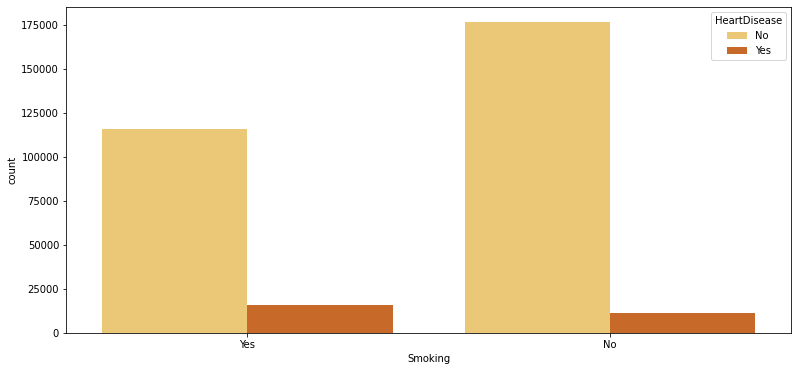

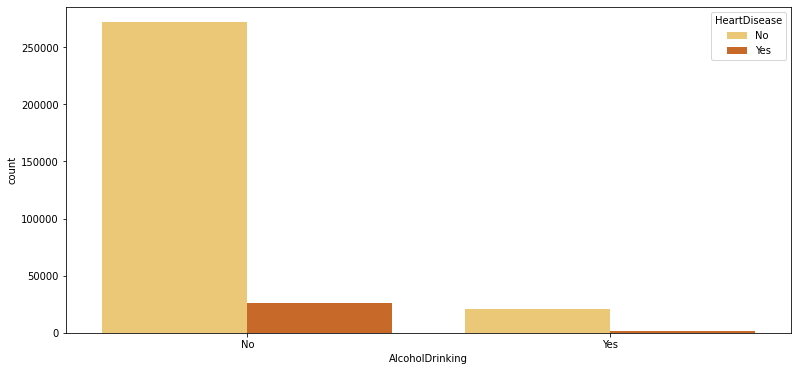

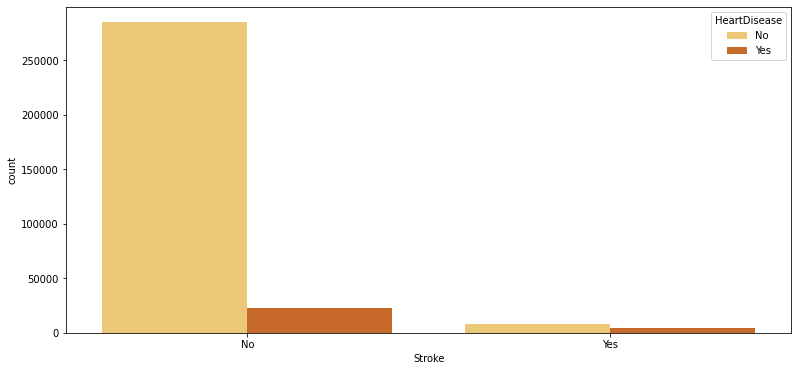

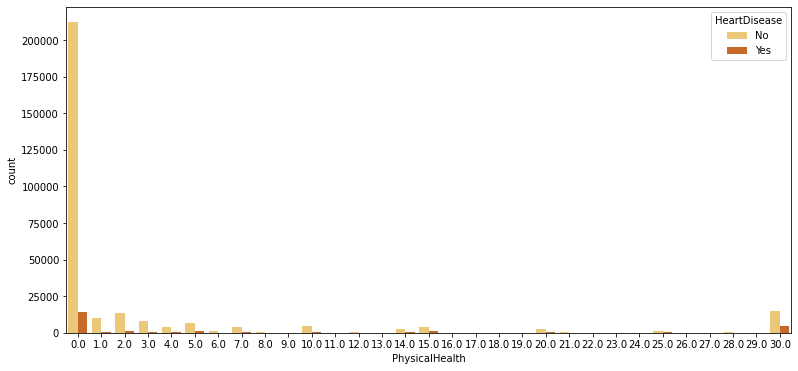

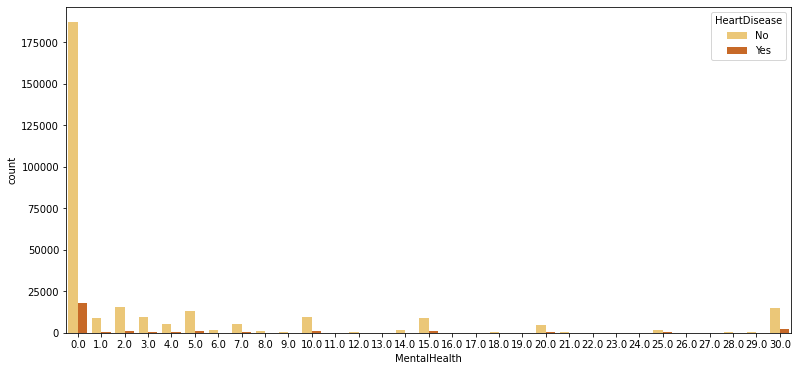

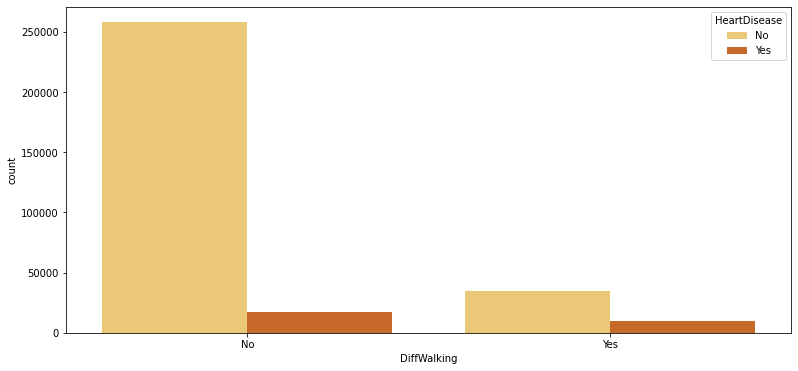

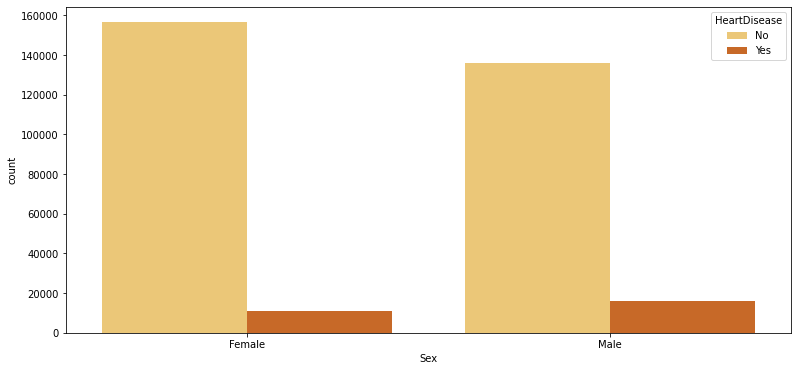

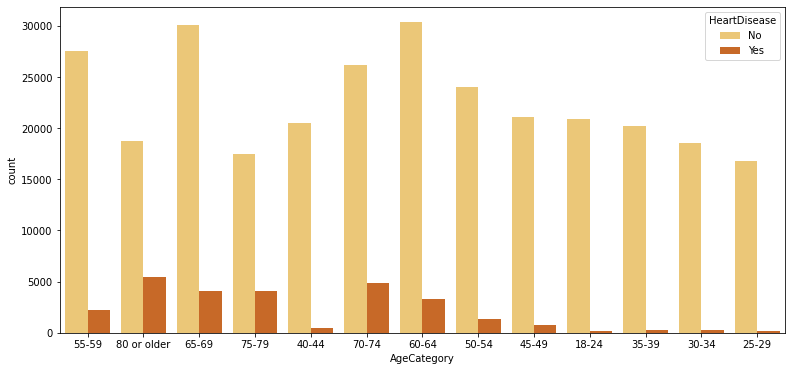

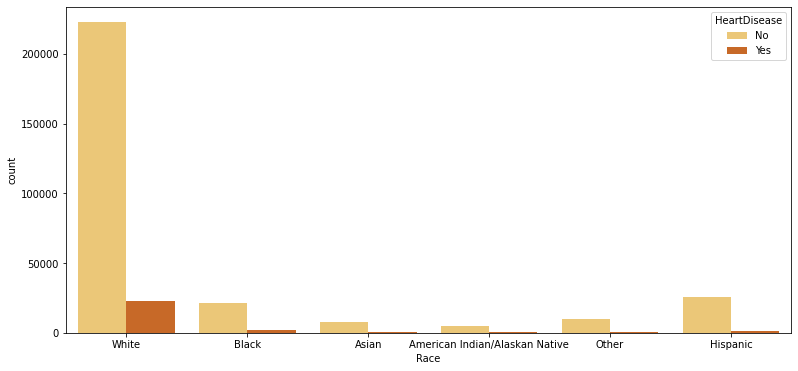

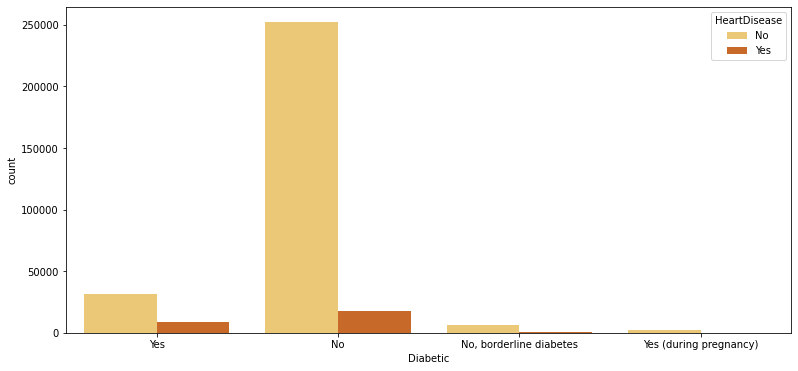

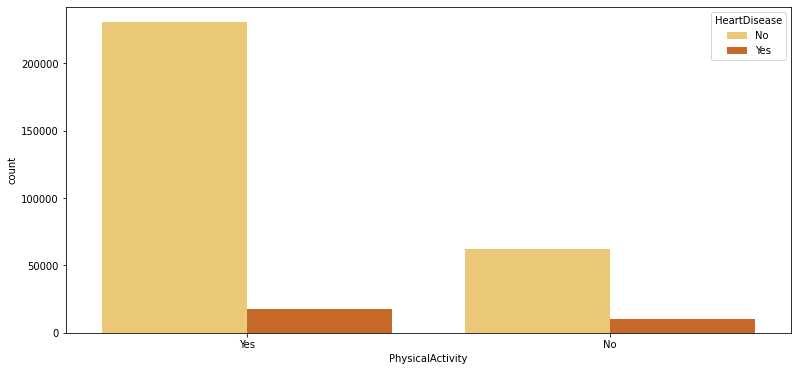

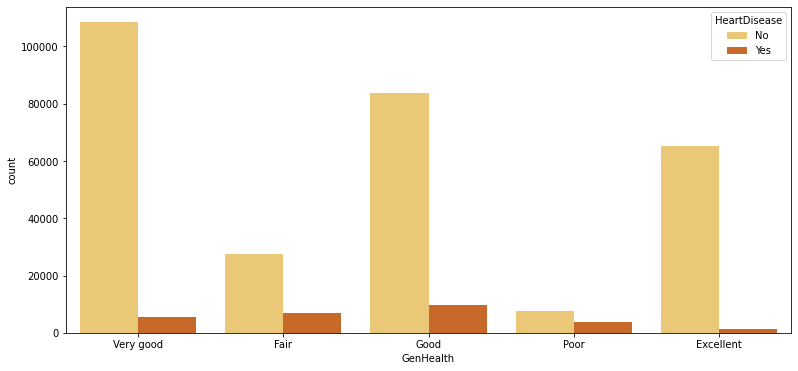

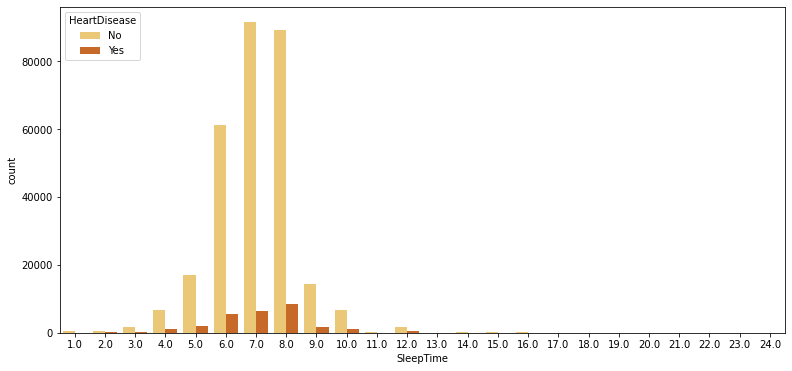

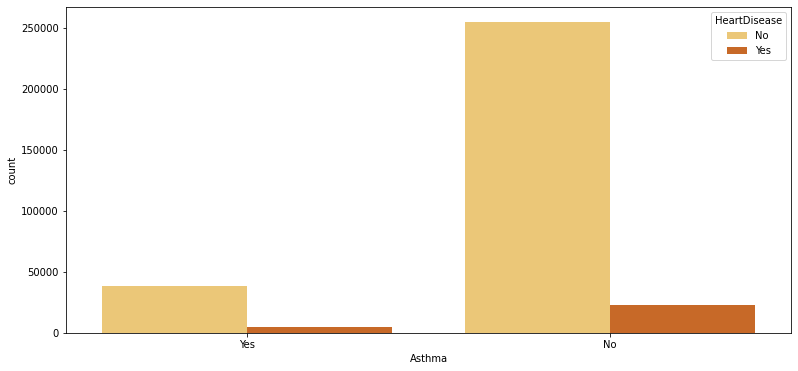

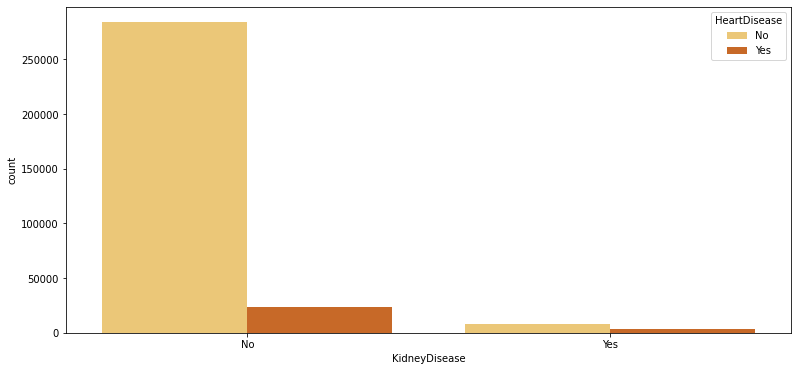

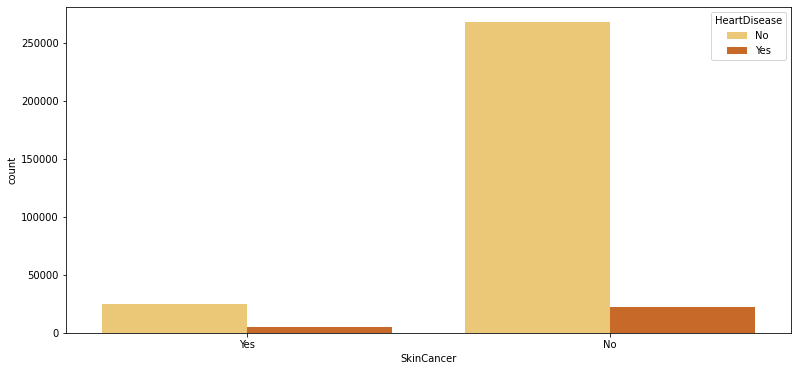

In [ ]:
#vẽ đồ thị để nhìn rỏ dữ liệu hơn 
import seaborn as sns
X=['Smoking'	,'AlcoholDrinking'	,'Stroke'	,'PhysicalHealth',	'MentalHealth','DiffWalking',	'Sex',	'AgeCategory'	,'Race',	'Diabetic',	'PhysicalActivity',	'GenHealth'	,'SleepTime',	'Asthma',	'KidneyDisease',	'SkinCancer',]
for x in X:
 plt.figure(figsize = (13,6))
 #YlOrBr
 sns.countplot( x= df[x], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
 plt.xlabel(x)
 plt.show()
#smoking-> hut thuoc co hai nhieu cho tim
#stroke -> bi dot quy anh huong toi tim
#MALE(nam)-> bi tim cao hon phu nu 
#tuoi cang cao-> bi benh tim cang cao
#Gen _> anh huong to, tim -> vi du fair,poor thi ty le benh tim cao

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


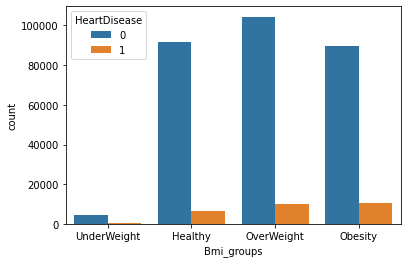

In [ ]:
import seaborn as sns
arr=['UnderWeight','Healthy','OverWeight','Obesity']
df['Bmi_groups']=pd.cut(x=df['BMI'],bins=[0,18.5,25,30,50],labels=arr)
sns.countplot('Bmi_groups',hue='HeartDisease',data=df)

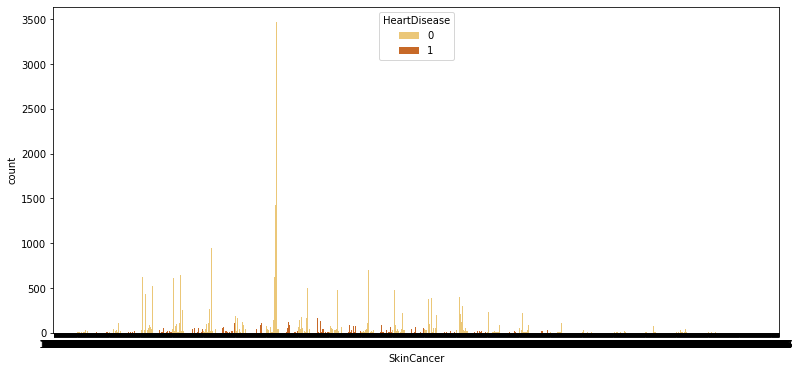

In [ ]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['BMI'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel(x)
plt.show()

#2 chuẩn bị dữ liệu


In [ ]:
# vì dữ liệu có chuổi nên muốn train model phải chuyển nó về dữ liệu int hết
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)
df['HeartDisease'].replace({'No':0, 'Yes' :1},inplace=True)
df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Bmi_groups
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1,UnderWeight
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0,Healthy
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0,OverWeight
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1,Healthy
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,1,1,0,3,6.0,1,0,0,OverWeight
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,1,0,1,1,5.0,1,0,0,OverWeight
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,1,0,1,2,6.0,0,0,0,Healthy
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,1,0,0,2,12.0,0,0,0,Obesity


In [ ]:
# nhìn dữ liệu 
df.describe()
# min + (max-min) * percentile
#25% có giá trị dưới X
#50%...

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


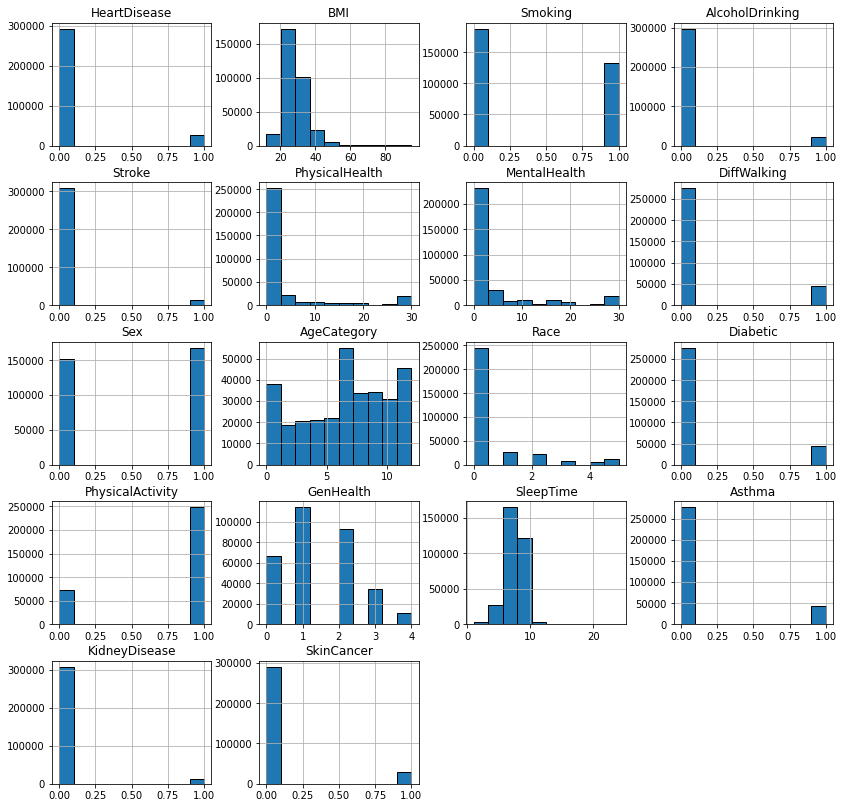

In [ ]:
# xem thông tin số lượng dữ liệu
import matplotlib.pyplot as plt
df.hist(edgecolor="black", linewidth=1, figsize=(14, 14))
plt.show()

#3 train model


In [ ]:
X=['BMI',	'Smoking'	,'AlcoholDrinking'	,'Stroke'	,'PhysicalHealth',	'MentalHealth','DiffWalking',	'Sex',	'AgeCategory'	,'Race',	'Diabetic',	'PhysicalActivity',	'GenHealth'	,'SleepTime',	'Asthma',	'KidneyDisease',	'SkinCancer',]
Y=['HeartDisease']


# dữ liệu train 70% , test 30% , và show độ chính xác của model:DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(df[X], df[Y], test_size=0.3, random_state=1)


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3).fit(X_train,y_train)

#criterion{“gini”, “entropy”}, default=”gini”


y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9151231511689719


In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#4
 Vẽ Cây và nhận xét

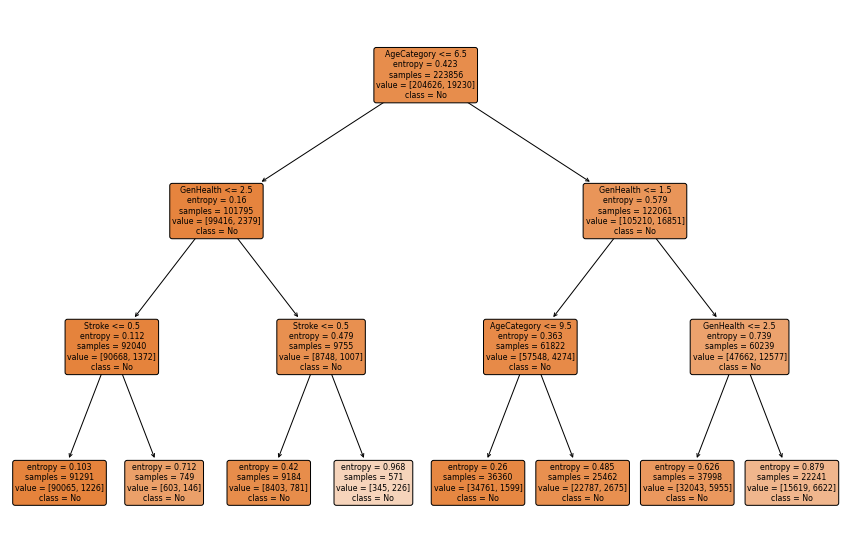

In [ ]:
# vẽ cây 
import matplotlib.pyplot as plt
from sklearn import tree
fig =plt.figure(figsize=(15,10))
g=tree.plot_tree(clf,feature_names =X , class_names = ['No','Yes'], filled = True, rounded = True)

In [ ]:


X=X_train[0:1:1]# bắt đầu hàng 0, kết thúc hàng 1,
print(X)
## dúng rẽ trái sai rẽ phải 
y_pred = clf.predict(X)
y_pred

         BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
273582  43.4        0                0       0             2.0           5.0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
273582            0    0            6     0         0                 1   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
273582          2        8.0       0              0           0  


array([0])

In [ ]:
X_train[0:2:1]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
273582,43.40,0,0,0,2.0,5.0,0,0,6,0,0,1,2,8.0,0,0,0
54829,36.85,1,0,0,20.0,0.0,1,1,10,0,0,0,2,8.0,0,0,1


In [ ]:
#max_depth ảnh hưởng tới độ chính xác
#max_dep >=1
# ta thấy  max_depth càng tăng dễ bị overfitting
#
for x in range(1,30):
 from sklearn.tree import DecisionTreeClassifier
 clf = DecisionTreeClassifier(criterion="entropy", max_depth=x).fit(X_train,y_train)
 #criterion{“gini”, “entropy”}, default=”gini”
 y_pred = clf.predict(X_train)
 from sklearn import metrics
 print(x)
 print("Accuracy: train",metrics.accuracy_score(y_train, y_pred))
 y_pred_test = clf.predict(X_test)
 print("Accuracy: test",metrics.accuracy_score(y_test, y_pred_test))


1
Accuracy: train 0.9140965620756201
Accuracy: test 0.9151231511689719
2
Accuracy: train 0.9140965620756201
Accuracy: test 0.9151231511689719
3
Accuracy: train 0.9140965620756201
Accuracy: test 0.9151231511689719
4
Accuracy: train 0.914217175326996
Accuracy: test 0.9148938387934
5
Accuracy: train 0.9151284754485026
Accuracy: test 0.9157068553977006
6
Accuracy: train 0.9154099063683797
Accuracy: test 0.9160820938304548
7
Accuracy: train 0.9158119505396326
Accuracy: test 0.9158736280344802
8
Accuracy: train 0.9163346079622614
Accuracy: test 0.9152795005159529
9
Accuracy: train 0.9172637767136016
Accuracy: test 0.9152795005159529
10
Accuracy: train 0.9186083911085698
Accuracy: test 0.9145394469402433
11
Accuracy: train 0.9205471374455007
Accuracy: test 0.9137368536257413
12
Accuracy: train 0.9229281323708098
Accuracy: test 0.9119648943599579
13
Accuracy: train 0.9258585876634979
Accuracy: test 0.9098489665308165
14
Accuracy: train 0.9294323136301909
Accuracy: test 0.9080561606854355
15
Ac